<a href="https://colab.research.google.com/github/Ngaspar20/Initial/blob/main/PYF_Project_LearnerNotebook_FullCode_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [188]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [189]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [190]:
# # uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [191]:
# Write your code here to read the data
data = pd.read_csv('/content/foodhub_order.csv')

In [192]:
# Write your code here to view the first 5 rows

data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [193]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
- There are 9 columns and 1898 rows in the data set

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three data types in the dataset and these are:
- order_id, customer_id, food_preparation_time and delivery_time - Int64(integers) type
- restaurant_name, cuisine_type, day_of_the_week and rating - objects(categorical data) type
- cost_of_the_order is - float64 type

Most of the variables are of the adequate type. The variable "ratings" although it has numbers Python adequately carecterizes it as an object (categorical variable).

There are 1 float64, 4 int64 and 4 objects

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [248]:
# it performs a sum of all null values for each of the variables
data.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0
net_revenue,0


In [249]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not givenNot given,25,20,36.9000,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not givenNot given54553545Not givenNot givenNo...,25,23,13.8920,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,54Not given3Not given54545Not given435Not give...,23,28,14.0645,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,35Not givenNot givenNot givenNot given5Not giv...,25,15,35.0400,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,44Not givenNot given,25,24,13.3285,49


#### Observations:
There are no missing values in the dataset because we can see in the shape info output that we have 1898 rows 9 columns, and the non-null summary for each of the variables show exactly 1898 which means there are no null values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [200]:
# Write your code here

data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- The minimum time that takes the food to be prepared is 20 min;
- The average time it takes to prepare the food is 27.37 min;
- The maximum time it takes is 35 min;




### **Question 5:** How many orders are not rated? [1 mark]

In [202]:
# selects the rating columns and calculates the sum of observations for each of the ratings
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [203]:
#calculates the proportion of the not rated
data['rating'].value_counts(normalize = True) * 100

,proportion
rating,
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


#### Observations:

There are 736 orders that the ratings is 'Not given' in the column 'ratings' which representes about aprox 39% of the data points in the variable rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [204]:
# Write the code here
# I will perform a univariate analysis where i will analyze variable by variable

data.describe().T # this syntax shows the summary of all quantitative data




,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


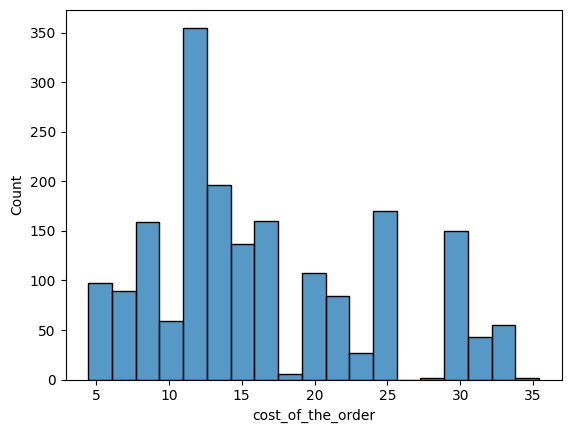

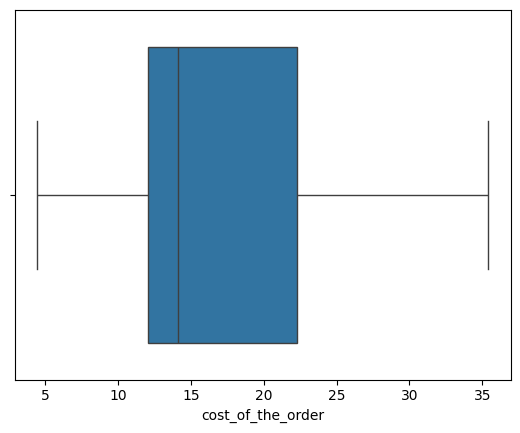

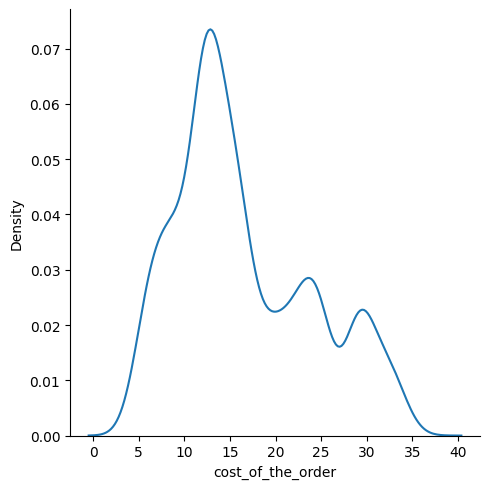

In [205]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'cost_of_the_order');
plt.show()
sns.boxplot(data = data, x = 'cost_of_the_order')
plt.show()
sns.displot(data=data,x='cost_of_the_order',kind='kde')
plt.show()

#### Observations on cost of order:

- Plotted the variable in a histogram, boxplot a kernel density estimate plot (kde) to see the distribution of the variable
- The plots show that there are no outliers.
- The histogram shows a right-skewed distribution with the majority of orders costing around 11 and 14. The sudden drop after around 15 shows that the majority of the orders are inexpensive but with a few expensive ones as we can see by the left tail.
- We can confirm in the boxplot the right-skewed distribution with the median at around 14 once more indicating low cost orders. the longer whisker to the right again suggests a few expensive orders.
- The density chart (KDE) illustrates a peak at around 13-14 and with additional peaks at around 20-25 and 30-35 which indicates a multimodal distribution, which can mean additional higher frequency of costs of orders due to different orders or group of orders. The KDE supports the observations in previos charts that the majority of orders are inexpensive with scattered more expensive orders.










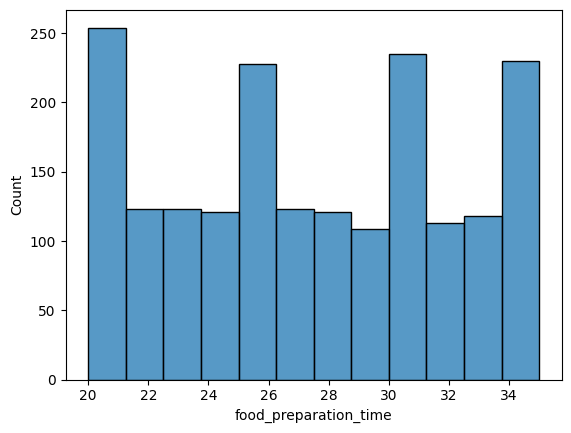

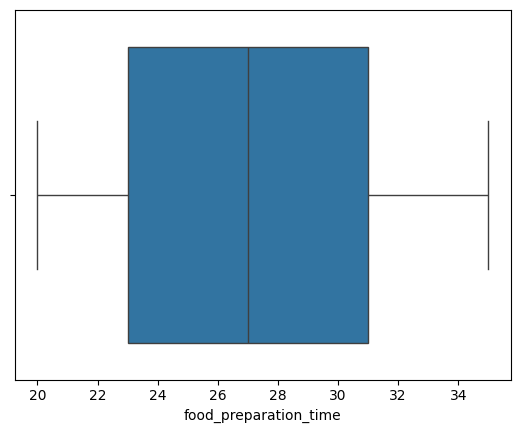

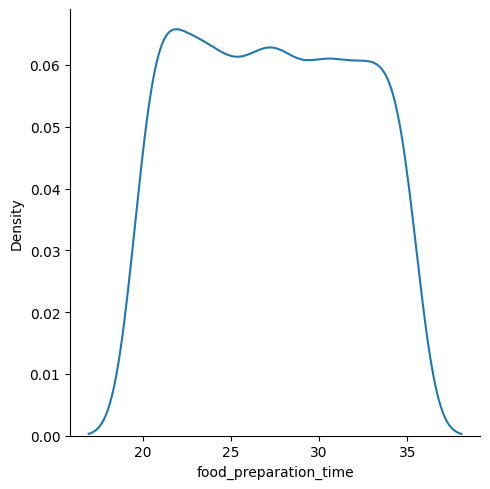

In [206]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'food_preparation_time');
plt.show()
sns.boxplot(data = data, x = 'food_preparation_time')
plt.show()
sns.displot(data=data,x='food_preparation_time',kind='kde')
plt.show()

#### Observations on food preparation time:

- The plots show that there are no outliers and the distribution has a normal but peculiar form where most of the values are spread between 20 to 35 min.
- The histogram shows that the data is roughly uniformly distributed.
There are no clear peaks, indicating that food preparation times are spread evenly across the range from around 20 to 35 minutes.
- The boxplot confirms the symmetry of the distribution. The Median is approximately in the middle of the interquartile range (around 27–28 minutes). There are no outliers, and the data is well spread between the minimum and maximum values.
Whiskers are nearly equal in length, reinforcing the even spread of values.
-The KDE plot is relatively flat, further supporting that the distribution is close to uniform suggesting no single preparation time is dominant.


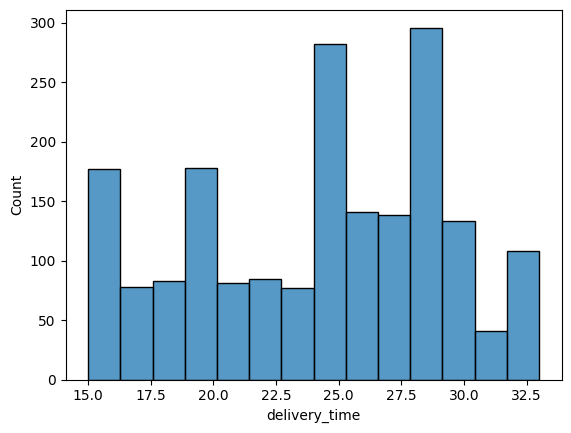

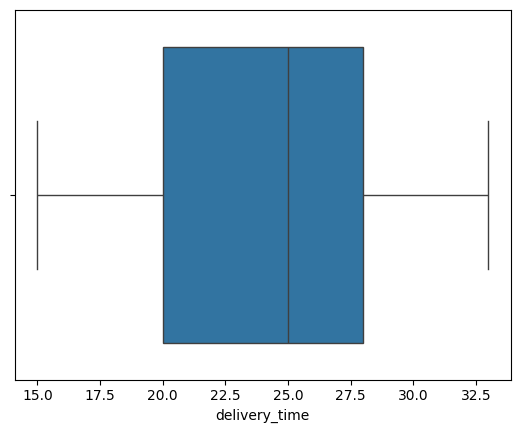

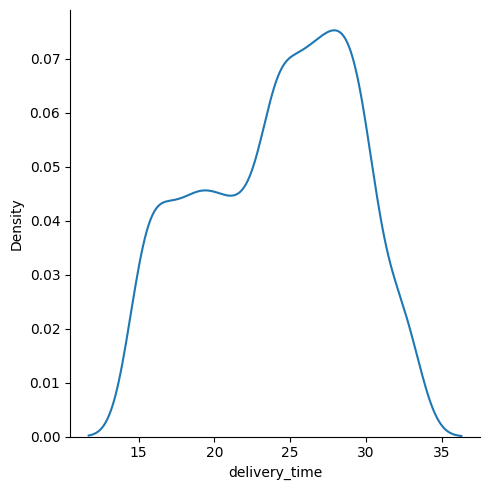

In [207]:
# this syntax will show the histogram distribution of the variable 'cost_of_the_order'
sns.histplot(data = data, x = 'delivery_time');
plt.show()
sns.boxplot(data = data, x = 'delivery_time')
plt.show()
sns.displot(data=data,x='delivery_time',kind='kde')
plt.show()

#### Observations on delivery time:

- The histogram shows a slightly left-skewed distribution, but relatively uniform with some mild peaks around 20, 25, and 28 minutes. Most delivery times are spread between 15 and 33 minutes.
There is no strong single peak, suggesting deliveries are fairly consistent but not clustered around one value.

- The boxplot reveals a fairly symmetric spread, with the median around 25 minutes.

The interquartile range (IQR) appears roughly between 20 to 29 minutes.

There are no visible outliers, and the whiskers are approximately equal in length, indicating balanced spread.

- The KDE curve indicates a bimodal or multimodal distribution with minor peaks — most notably around 20 minutes and another broader one around 28-29 minutes.The distribution is not perfectly smooth or normal, but it does not show extreme skewness.

NOTE: The analysis was not performed for user-ID and customer-ID because although they are integers there is no value in analyzing them as quantitative variables




In [208]:
data['restaurant_name'].value_counts() # looks into the restaurant columns and counts de frequency for each restaurant
# there are at least 178 restaurants


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


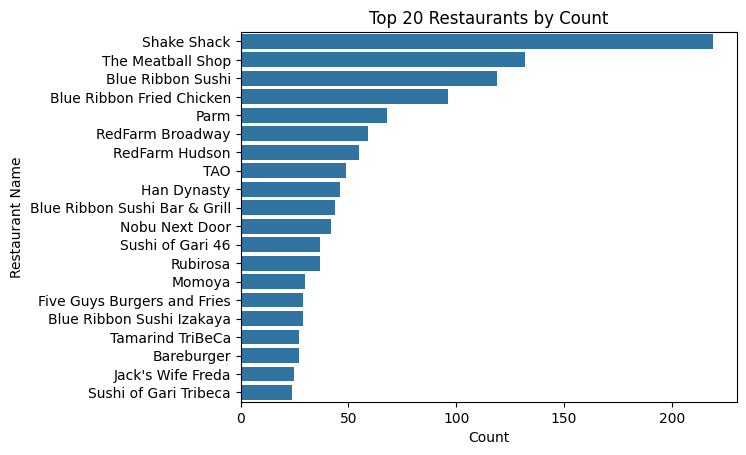

In [209]:
top_restaurants = data['restaurant_name'].value_counts().nlargest(20)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index)
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.title("Top 20 Restaurants by Count")
plt.show()




#### Observations on Restaurants names and frequency of order for the respective restaurant:
For this visualization i had to reduce the number of visualizations since there are around 178 individual restaurants. For more clear visualizations the number of restaurants to visualize was reduced to the top 20.
- The observation shows that the top 20 restaurants with the majority of the orders are reflected in the chart

In [210]:
data['cuisine_type'].unique() # shows all the different categories of cuisine type


array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

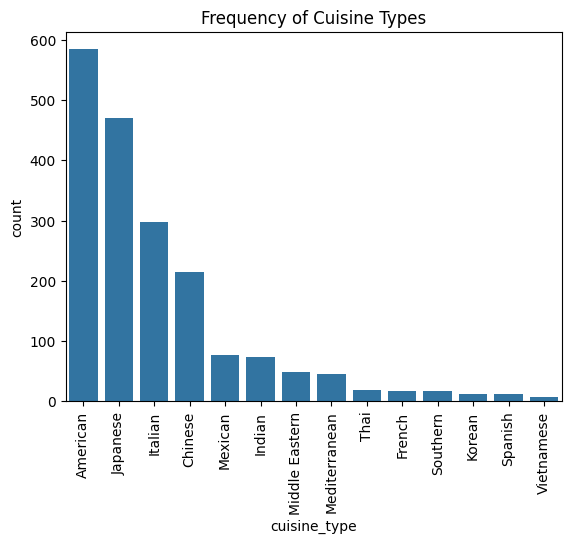

In [211]:
sns.countplot(data=data, x='cuisine_type', order=data['cuisine_type'].value_counts().index)
plt.xlabel("cuisine_type")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Frequency of Cuisine Types")
plt.show()


#### Observations on cuisine style:
- The bar chart shows that there are 14 different styles of cuisine. The top 5 in terms of frequency of orders are: American (590 orders), Japanese(490), Italian(300), Chinese(200) and Mexican(90) in the respective order.
- The least bought cuisine are: Spanish and Vietnamise (negligible amount)

In [212]:
data['day_of_the_week'].unique() # shows all the different categories of days of the week


array(['Weekend', 'Weekday'], dtype=object)

In [213]:
data['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


In [214]:
data['day_of_the_week'].value_counts(normalize=True) * 100

,proportion
day_of_the_week,
Weekend,71.18019
Weekday,28.81981


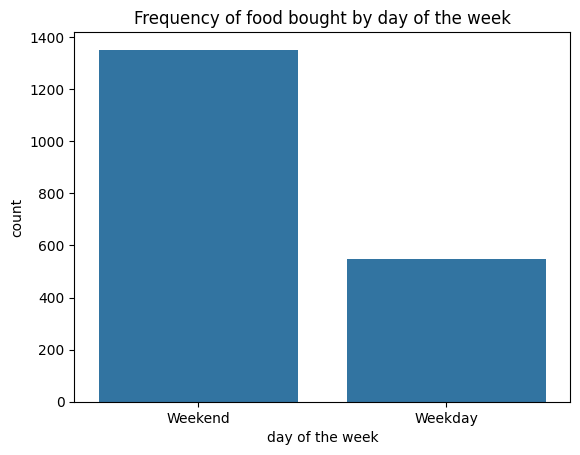

In [215]:
sns.countplot(data=data, x='day_of_the_week')
plt.xlabel("day of the week")
plt.ylabel("count")
plt.title("Frequency of food bought by day of the week")
plt.show()


#### Observations on orders by day of the week variable:
- The bar graph shows that the majority of orders were made during the weekends, aproxt. 1300 (71%) in comparison with weekdays of aproxt 600 (29%). The orders during the weekens doubled the orders during the weekdays.

In [216]:
data['rating'].unique() # shows all the different categories of days of the week


array(['Not given', '5', '3', '4'], dtype=object)

In [217]:
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [218]:
data['rating'].value_counts(normalize=True) * 100

,proportion
rating,
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


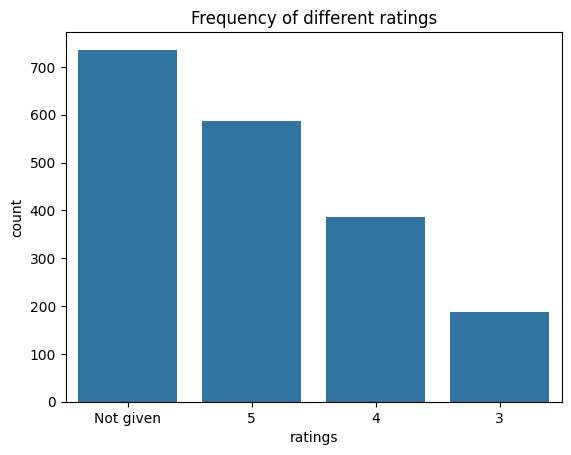

In [219]:
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.xlabel("ratings")
plt.ylabel("count")
plt.title("Frequency of different ratings")
plt.show()


#### Observations on ratings:
- Customers have rated their satisfaction with food in 4 different categories, namely, 'No rate', '5', '4' and '3'
- It can be seen that the majority of customers, more then 700(39%) did not rate the food.
- Apart from the ones that have not rated it the majority of clients gave good rates for the food, almost 600(31%) rated (5), 400(20%) rated (4) and 190 (10%) rated (3).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

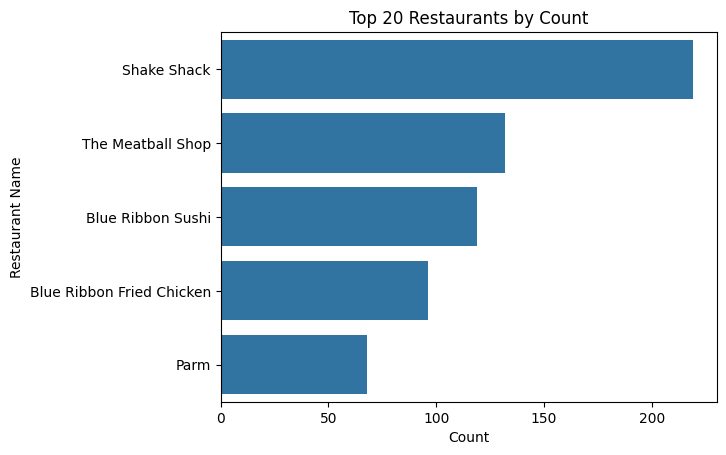

In [220]:
# Write the code here
top_restaurants = data['restaurant_name'].value_counts().nlargest(5)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index)
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.title("Top 20 Restaurants by Count")
plt.show()


#### Observations:

The top 5 restaurants in terms of frequency of orders are, 'Shake Shake' with aproxt 230 orders, followed by 'The Meatball Shop' with 140 orders, 'Blue Ribbon Sushi' with 125 orders, 'Blue Ribbon Fried Chicken' with 100 orders and finally 'Parm' with 70 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [221]:
# Write the code here
data.groupby('day_of_the_week')['cuisine_type'].value_counts()


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

In [222]:
# Write the code here
data.groupby('day_of_the_week')['cuisine_type'].value_counts(normalize = True)*100


day_of_the_week  cuisine_type  
Weekday          American          30.895795
                 Japanese          24.680073
                 Italian           16.636197
                 Chinese            9.506399
                 Indian             4.387569
                 Mexican            4.387569
                 Middle Eastern     3.107861
                 Mediterranean      2.559415
                 Southern           1.096892
                 French             0.914077
                 Thai               0.731261
                 Vietnamese         0.548446
                 Korean             0.365631
                 Spanish            0.182815
Weekend          American          30.717987
                 Japanese          24.796447
                 Italian           15.321984
                 Chinese           12.065137
                 Mexican            3.923020
                 Indian             3.626943
                 Mediterranean      2.368616
                 Middle Eastern     2.368616
                 Thai               1.110289
                 French             0.962250
                 Korean             0.814212
                 Southern           0.814212
                 Spanish            0.814212
                 Vietnamese         0.296077
Name: proportion, dtype: float64

#### Observations:
On the weekends we can see that the most popular cuisine is the 'American' with 415 orders representing 31% of all the weekend orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [223]:
# # Write the code here
cost_order = data['cost_of_the_order']
cost_order1 = cost_order > 20
percentage = (cost_order1.sum() / len(cost_order)) * 100
print(percentage)

29.24130663856691


In [224]:
percentage = (data['cost_of_the_order'] > 20).mean() * 100
percentage



np.float64(29.24130663856691)

#### Observations:

A total of 29% of the orders cost more then 20 dolars!

### **Question 10**: What is the mean order delivery time? [1 mark]

In [225]:
# Write the code here

data['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
The mean order delivery time is 24 mins!

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [226]:
# Write the code here
data['customer_id'].value_counts()



,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


#### Observations:
- The top 3 customer IDs are: 52832 (13 orders),
 47440 (10 orders) and 83287 (9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Summary of the approach:

- Identify the most important variables:
The most important numerical variables are: cost_of_order, food_preparation_time, delivery_time

The most important categorical variables are: cuisine_type, day_of_the_week and rating


In [227]:
# # Write the code here
# # Produced a sub-set of the data in the data set in order to being able
# # to analyze the relationship between the numerical variables

new_data = data[['cost_of_the_order','food_preparation_time','delivery_time']]



In [228]:
filtered_data = data[data['rating'] != 'Not given'].copy()


In [229]:
filtered_data['rating'] = pd.to_numeric(filtered_data['rating'])


In [230]:
# Analyze the relationship between different categorical variables

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [231]:
corr_data = filtered_data[['rating','cost_of_the_order', 'food_preparation_time', 'delivery_time']]
corr_data.head(2)


,rating,cost_of_the_order,food_preparation_time,delivery_time
2,5,12.23,23,28
3,3,29.20,25,15


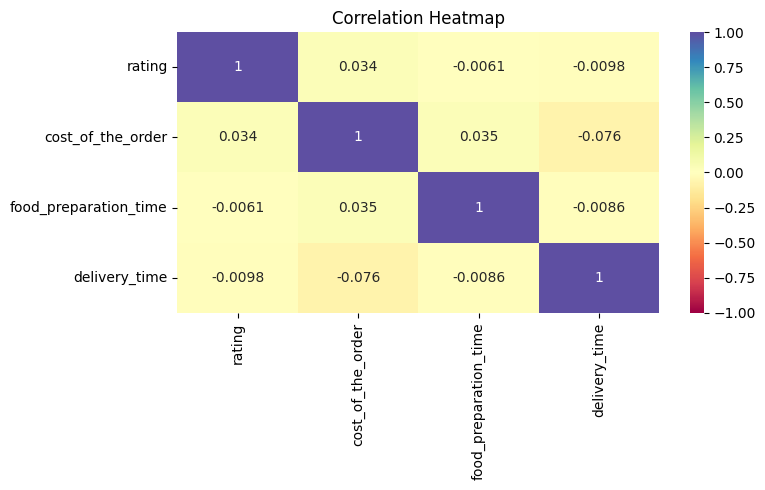

In [232]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#### Observations:

The correlation heatmap shows that there is no strong linear relationship between the variables cost_of_the_order, food_preparation_time, delivery_time, and rating. The correlation between rating and cost_of_the_order is very weak and positive (+0.034), suggesting that customer ratings are almost unaffected by how much they paid for the order. In addition, the correlation between rating and food_preparation_time is nearly zero (–0.0061), indicating no meaningful relationship. The same can be seen for the correlation between rating and delivery_time (–0.0098).

Among the other variables, cost_of_the_order shows a very weak positive correlation with food_preparation_time (+0.035) and a slightly stronger but still weak negative correlation with delivery_time (–0.076), which could suggest that higher-cost orders may be delivered slightly faster. However, the correlation between food_preparation_time and delivery_time is negligible (–0.0086).

Overall, the correlation values indicate that there are no significant linear relationships among these variables in the dataset.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [233]:
# Write the code here
data['rating'] = data.groupby('restaurant_name')['rating'].transform('sum')


In [234]:
# Group by restaurant and calculate the rating count and average rating
restaurant_summary = filtered_data.groupby('restaurant_name')['rating'].agg(['count', 'mean'])


In [235]:
# Select from the data set filtered_data the restaurants the meet the criteria
promotional_restaurant = restaurant_summary[(restaurant_summary['count'] > 50) & (restaurant_summary['mean'] > 4)]

In [236]:
# See a snapshot of the restaurants that meet the criteria
promotional_restaurant.round()

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.0
Blue Ribbon Sushi,73,4.0
Shake Shack,133,4.0
The Meatball Shop,84,5.0


#### Observations:
The elegible restaurants are:
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [237]:
# this syntax selects the column of the data 'cost_of_the_order'
# It creates a new column named 'net_revenue
# It applies the conditional syntax based on the cost for 20 and 5 dollars respectively per restaurant
#
cost_order_only = data['cost_of_the_order']

data['net_revenue'] = np.where(
    cost_order_only > 20,
    cost_order_only + (cost_order_only * 0.20),
    np.where(
        cost_order_only > 5,
        cost_order_only + (cost_order_only * 0.15),
        cost_order_only
    )

)



In [259]:
# check if the net_revenue has been properly added to the columns
data.head(2)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not givenNot given,25,20,36.900,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not givenNot given54553545Not givenNot givenNo...,25,23,13.892,48


In [260]:
total_revenue = data['net_revenue'].sum()
print(total_revenue.round())

36743.0


#### Observations:
The net revenue generated across all others is 36.743USD

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [266]:
# create a new column name total delivery time
# add the time of preparation to the delivery time to get the total delivery time
# confirm in the snapshot of the table if it has added the two columns
data['total_delivery_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not givenNot given,25,20,36.9000,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not givenNot given54553545Not givenNot givenNo...,25,23,13.8920,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,54Not given3Not given54545Not given435Not give...,23,28,14.0645,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,35Not givenNot givenNot givenNot given5Not giv...,25,15,35.0400,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,44Not givenNot given,25,24,13.3285,49


In [242]:
# select the orders that have more then 60 min delivery time
data['total_delivery_time'] > 60


,total_delivery_time
0,False
1,False
2,False
3,False
4,False
...,...
1893,False
1894,False
1895,False
1896,False


In [277]:
# Count how many deliveries took more than 60 minutes
delivery_time_count = (data['total_delivery_time'] > 60).sum()

# calculate the number of deliveries
total_deliveries = len(data)

# Calculate percentage
percentage_over_60 = (delivery_time_count / total_deliveries) * 100

# Print result
print(percentage_over_60)


10.537407797681771


In [286]:
# identify which restaurants have delivery time above 60

long_deliveries = data[data['total_delivery_time'] > 60]

# Shows the names of restaurants that have delivery times above 60
long_deliveries['restaurant_name'].unique()

array(['Barbounia', 'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Blue Ribbon Sushi',
       'Cafe Mogador', "Jack's Wife Freda", 'Blue Ribbon Fried Chicken',
       'RedFarm Hudson', 'Han Dynasty', 'Shake Shack',
       "Xi'an Famous Foods", 'Momoya', 'RedFarm Broadway',
       'Sushi of Gari 46', 'Five Guys Burgers and Fries', 'Parm',
       '5 Napkin Burger', 'Cafe Habana', 'Taro Sushi',
       'Tarallucci e Vino Restaurant', 'The Meatball Shop',
       'Blue Ribbon Sushi Bar & Grill', "Bubby's ",
       'Dirty Bird To Go (archived)', 'Tamarind TriBeCa', 'Mira Sushi',
       "Vanessa's Dumpling House", "S'MAC", 'The Kati Roll Company',
       "P.J. Clarke's", 'Melt Shop', 'Nobu Next Door',
       'Balthazar Boulangerie', 'J. G. Melon',
       'Blue Ribbon Sushi Izakaya', 'indikitch', 'Hot Kitchen', 'Junoon',
       'Osteria Morini', "Vanessa's Dumplings", 'Bareburger',
       'Cipriani Le Specialita', 'Chipotle Mexican Grill $1.99 Delivery',
       'Sushi Choshi', "Sarabeth's East", 'Sushi of G

In [267]:
#calculates the percentages of restaurants with delivery time above 60
percentage_of_deliveries = (data['total_delivery_time'] > 60).mean() * 100
print(round(percentage_of_deliveries))

11


#### Observations:
About 11% of the all the orders have a total delivery time of more then 60 min which is a small proportion.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [245]:
# Group the data by day of the week
# produce a table with the means
data.groupby(['day_of_the_week'])['total_delivery_time'].mean().round()


,total_delivery_time
day_of_the_week,
Weekday,56.0
Weekend,50.0


#### Observations:
As per the table above, the mean delivery time is slightly higher during the weekdays about 6 percentual points

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Customer Feedback Is Incomplete but Generally Positive
•	39% of customers did not rate their orders, which is a significant gap in feedback data.
•	Among those who did rate, over 80% gave 4 or 5 stars, indicating overall satisfaction.

Certain Cuisines Drive Higher Demand
•	The top 5 cuisines by order volume are: American, Japanese, Italian, Chinese, and Mexican.
•	American cuisine dominates, accounting for more than 30% of total orders.

Prominent Restaurants Are Consistent in Quality
•	Only 4 restaurants met the criteria of >50 ratings with an average rating > 4:
o	Shake Shack
o	The Meatball Shop
o	Blue Ribbon Sushi
o	Blue Ribbon Fried Chicken

Order Cost and Ratings Are Weakly Related
•	There's no strong correlation between order cost and customer rating, suggesting customers value service quality more than price.

Operational Efficiency Is Stable
•	The average food preparation time is ~27 minutes.
•	The average delivery time is ~24 minutes.
•	Only 10% of deliveries take more than 60 minutes — a manageable rate.

Weekends Are Peak Ordering Times
•	71% of all orders occur on weekends, showing strong weekend dependency.



### Recommendations:

1.	Encourage more customers to rate their orders.
Almost 40% of the orders don't have any rating, which limits our ability to understand satisfaction levels. Offering small discounts, loyalty points, or follow-up notifications after delivery could help increase feedback and improve data-driven decisions.
2.	Promote the top-rated restaurants more visibly in the app.
Restaurants like Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken consistently perform well. These can be highlighted using badges, banners, or priority listing. Similar lesser-known restaurants with good performance should also be considered for promotional exposure.
3.	Use cuisine trends to guide campaigns and offers.
American, Japanese, and Italian cuisines are the most ordered. We could create bundles or targeted discounts focused on these. At the same time, underrepresented cuisines like Spanish and Vietnamese could be promoted through limited time offers or special category days to test engagement.
4.	Prepare for weekend demand.
With 71% of orders placed during weekends, more delivery personnel should be available on those days. App notifications or exclusive weekend offers sent out in advance (e.g., Friday) could help manage volume and maximize revenue.
5.	Address delivery delays by over 60 minutes.
Although only 10% of orders fall into this category, they should be reviewed. Identify the restaurants or routes involved and assess whether better logistics planning, route optimization, or alert systems can reduce the delay and improve customer experience.





---